In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np

# Problem 1

Solve

$\begin{cases} -(au')'=f,& x\in(0,1) \\ a(0)u'(0)=c_0,& a(1)u'(1)=c_1 \end{cases}$

for $a(0)$ using the following conditions:

$c_0 = 3/8$, 

$c_1 = 5/4$, 

$u(x) = x^2 + x/2 + 5/16$, 

$x_j = .1j$ for $j = 0,1,...,10$, and

$f = \begin{cases} -6x^2 + 3x - 1 & x \leq 1/2 \\ -1 & 1/2 < x \leq 1 \end{cases}$

NOTE: $\int_0^x f(s)ds = -2s^3 + \frac{3}{2}s^2 - s |_0^x = -2x^3 + \frac{3}{2}x^2 - x$

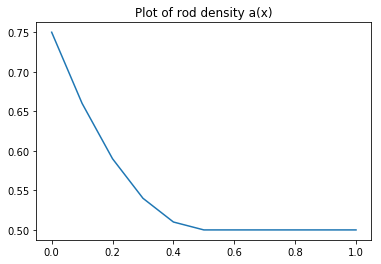

In [9]:
# Setup varaibles
c0 = 3/8
c1 = 5/4
u = lambda x : x**2 + x / 2 + 5/16
du = lambda x : 2 * x + 1 / 2
xj = np.linspace(0,1,11)
f = lambda x : -6 * x**2 + 3 * x - 1 if x <= 1/2 else -1
F = lambda x : -2 * x**3 + 3/2 * x**2 - x if x <= 1/2 else F(1/2) - (x - 1/2)

# Solve for a(x)
def constraint(a):
    return sum([ (( c0 - F(xi))/ai - du(xi))**2 for xi,ai in zip(xj,a) ])
a = minimize(constraint,np.ones(11)).x

# Plot solution
plt.plot(xj,a)
plt.title("Plot of rod density a(x)")
plt.show()

# Problem 2

Find the density $a(x)$ using the following conditions:

$c_0 = 1$, 

$c_1 = 2$, 

$u(x) = x + 1 + \epsilon sin(\epsilon^{-2}x)$ for several $\epsilon > 0.6605$ 

$x_j = .1j$ for $j = 0,1,...,10$, and

$f = -1$

NOTE: $\int_0^x f(s)ds = -s|_0^x = -x$

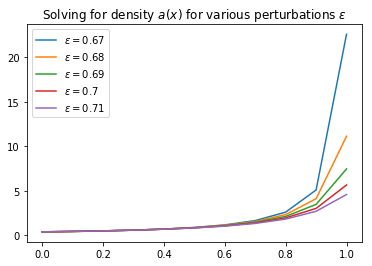

In [24]:
# Set up new variables
c0 = 1
c1 = 2
eps = [.67,.68,.69,.70,.71]
F = lambda x: -x
x = np.linspace(0,1,11)

for e in eps:
    # Define new u(x) with different sized perturbation
    du = lambda x : 1 + 1/e * np.cos(e**(-2) * x)
    
    # Solve for optimal a(x)
    def constraint(a):
        return sum(((c0 - F(xi))/ai - du(xi))**2 for ai,xi in zip(a,xj))
    a = minimize(constraint, np.ones(11)).x
    
    plt.plot(x, a, label="$\epsilon = {}$".format(e))
plt.title("Solving for density $a(x)$ for various perturbations $\epsilon$")
plt.legend()
plt.show()